Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [26]:
import pandas as pd
import requests
import numpy as np
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap as bm

In [27]:
bikes = pd.read_csv("CDMX_bikes.csv")
foursquare = pd.read_csv("foursquare_df.csv")
yelp = pd.read_csv("yelp_df.csv")

foursquare.head()


,Unnamed: 0,POI_name,latitude,longitude,category_name,category_id,price,rating,distance,bike_ll
0,0,Cueva Colomba,19.437340,-99.137459,Bar,13003,2.0,6.1,13,"19.4374,-99.137571"
1,1,Tintico,19.437210,-99.137425,Coffee Shop,13035,1.0,7.6,16,"19.4374,-99.137571"
2,2,La Cueva Colomba,19.437141,-99.137434,Pub,13018,1.0,6.1,18,"19.4374,-99.137571"
3,3,Tintico Cafe & Galeria,19.437250,-99.137483,Café,13034,NaN,NaN,19,"19.4374,-99.137571"
4,4,Cantina Río de la Plata,19.437195,-99.137617,Beer Bar,13006,1.0,6.6,20,"19.4374,-99.137571"


In [28]:
interim_merge = pd.merge (bikes, foursquare, left_on="ll", right_on="bike_ll")
interim_merge.head()

,uid,latitude_x,longitude_x,empty_slots,free_bikes,ll,Unnamed: 0,POI_name,latitude_y,longitude_y,category_name,category_id,price,rating,distance,bike_ll
0,109,19.4374,-99.137571,15,4,"19.4374,-99.137571",0,Cueva Colomba,19.437340,-99.137459,Bar,13003,2.0,6.1,13,"19.4374,-99.137571"
1,109,19.4374,-99.137571,15,4,"19.4374,-99.137571",1,Tintico,19.437210,-99.137425,Coffee Shop,13035,1.0,7.6,16,"19.4374,-99.137571"
2,109,19.4374,-99.137571,15,4,"19.4374,-99.137571",2,La Cueva Colomba,19.437141,-99.137434,Pub,13018,1.0,6.1,18,"19.4374,-99.137571"
3,109,19.4374,-99.137571,15,4,"19.4374,-99.137571",3,Tintico Cafe & Galeria,19.437250,-99.137483,Café,13034,NaN,NaN,19,"19.4374,-99.137571"
4,109,19.4374,-99.137571,15,4,"19.4374,-99.137571",4,Cantina Río de la Plata,19.437195,-99.137617,Beer Bar,13006,1.0,6.6,20,"19.4374,-99.137571"


In [29]:
interim_2 = pd.merge(bikes, yelp, left_on="ll", right_on="bike_ll")
interim_2["rating"] = interim_2["rating"] *2
interim_2.head()

,uid,latitude_x,longitude_x,empty_slots,free_bikes,ll,Unnamed: 0,POI_name,latitude_y,longitude_y,category_name,price,rating,distance,bike_ll
0,102,19.429189,-99.132759,15,0,"19.429189,-99.132759",0,Casa de la Luz,19.429510,-99.132980,Hotels,NaN,9.0,49.0,"19.429189,-99.132759"
1,253,19.427059,-99.137116,9,2,"19.427059,-99.137116",1,Marisqueria Victoria,19.427342,-99.136988,Juice Bars & Smoothies,$,10.0,34.0,"19.427059,-99.137116"
2,88,19.422148,-99.160645,10,13,"19.422148,-99.160645",2,Sartoria,19.421983,-99.160581,Italian,NaN,7.0,20.0,"19.422148,-99.160645"
3,88,19.422148,-99.160645,10,13,"19.422148,-99.160645",3,Buna,19.421939,-99.160531,Cafeteria,$,9.0,26.0,"19.422148,-99.160645"
4,88,19.422148,-99.160645,10,13,"19.422148,-99.160645",4,Café Toscano,19.421867,-99.160464,Cafeteria,$$,7.0,37.0,"19.422148,-99.160645"


In [30]:
merged_df = pd.concat([interim_merge, interim_2], axis=0)
merged_df.drop("ll", axis=1, inplace=True)
merged_df.drop("Unnamed: 0", axis=1, inplace=True)
merged_df.drop( ["uid"], axis=1, inplace=True)
merged_df.drop( ["latitude_x", "longitude_x"], axis=1, inplace=True)
#merged_df.drop("Unnamed: 0", axis=1, inplace=True)
merged_df.rename(columns={ "longitude_y" : "POI_longitude", "latitude_y" : "POI_latitude" }, inplace=True)

merged_df.head()

,empty_slots,free_bikes,POI_name,POI_latitude,POI_longitude,category_name,category_id,price,rating,distance,bike_ll
0,15,4,Cueva Colomba,19.437340,-99.137459,Bar,13003.0,2.0,6.1,13.0,"19.4374,-99.137571"
1,15,4,Tintico,19.437210,-99.137425,Coffee Shop,13035.0,1.0,7.6,16.0,"19.4374,-99.137571"
2,15,4,La Cueva Colomba,19.437141,-99.137434,Pub,13018.0,1.0,6.1,18.0,"19.4374,-99.137571"
3,15,4,Tintico Cafe & Galeria,19.437250,-99.137483,Café,13034.0,NaN,NaN,19.0,"19.4374,-99.137571"
4,15,4,Cantina Río de la Plata,19.437195,-99.137617,Beer Bar,13006.0,1.0,6.6,20.0,"19.4374,-99.137571"


In [31]:
#equalize data across the two POI sources

merged_df["price"] = np.where (merged_df["price"] == "$$$", 5,       
np.where (merged_df["price"] == "$$", 3.3,
np.where (merged_df["price"] == "$", 1.7, merged_df["price"]) ))

In [36]:
merged_df["bike_latitude"] = merged_df['bike_ll'].str.split(',').str[0].astype(float)
merged_df["bike_longitude"] = merged_df['bike_ll'].str.split(',').str[1].astype(float)

In [49]:
merged_df.to_csv("bikes_POIs_df.csv")

Provide a visualization and explain the pattern discovered

In [37]:
# creates the correlation for each of the columns against each of the other columns
matrix = merged_df.corr()
matrix

,empty_slots,free_bikes,POI_latitude,POI_longitude,category_id,rating,distance,bike_latitude,bike_longitude
empty_slots,1.000000,-0.436036,-0.133369,-0.373457,0.021154,-0.001343,-0.019299,-0.131693,-0.372054
free_bikes,-0.436036,1.000000,0.058801,0.244177,-0.030431,-0.007422,0.030906,0.060191,0.245644
POI_latitude,-0.133369,0.058801,1.000000,0.180858,-0.075086,0.003340,-0.006205,0.996310,0.175031
POI_longitude,-0.373457,0.244177,0.180858,1.000000,-0.114819,-0.007125,0.000930,0.174671,0.996518
category_id,0.021154,-0.030431,-0.075086,-0.114819,1.000000,-0.107675,-0.005773,-0.074919,-0.114962
rating,-0.001343,-0.007422,0.003340,-0.007125,-0.107675,1.000000,-0.016838,0.008818,-0.001998
distance,-0.019299,0.030906,-0.006205,0.000930,-0.005773,-0.016838,1.000000,-0.006397,0.000892
bike_latitude,-0.131693,0.060191,0.996310,0.174671,-0.074919,0.008818,-0.006397,1.000000,0.175817
bike_longitude,-0.372054,0.245644,0.175031,0.996518,-0.114962,-0.001998,0.000892,0.175817,1.000000


<AxesSubplot:>

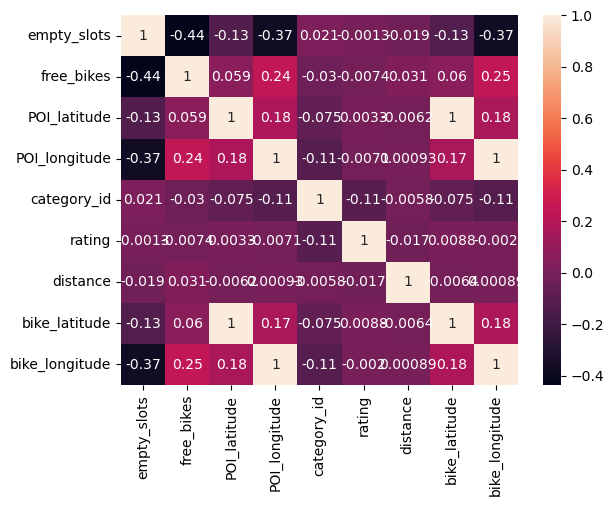

In [38]:
sns.heatmap(matrix, annot=True)

<AxesSubplot:xlabel='POI_latitude', ylabel='POI_longitude'>

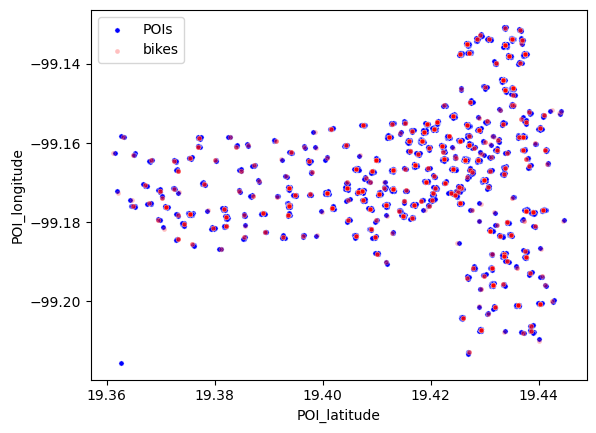

In [48]:
merged_df["reversed_POI_lat"] = merged_df["POI_latitude"]
sns.scatterplot(x="POI_latitude", y="POI_longitude", data=merged_df, color='blue', alpha=1, s=14, label="POIs")
sns.scatterplot(x="bike_latitude", y="bike_longitude", data=merged_df, color='red', alpha=0.25, s=12, label="bikes")

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [51]:
import sqlite3
connection = sqlite3.connect("bikes_POIs_database.db")
merged_df.to_sql("bikes_POIs_df", connection, if_exists="replace")
connection.close()

Look at the data before and after the join to validate your data.